In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("Life Expectancy Data.csv")
df1 = data.copy()


for column in df1.columns:
    if column == 'Life expectancy ': continue
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)

labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R^2 Score:", round(r2, 2))


Mean Absolute Error (MAE): 1.23
Mean Squared Error (MSE): 3.87
R^2 Score: 0.96


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('Life Expectancy Data.csv')

for column in df1.columns:
    if column == 'Life expectancy ': continue
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)

labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae_before_scaling = mean_absolute_error(y_test, y_pred)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mae_after_scaling = mean_absolute_error(y_test, y_pred)

print('MAE before scaling:', mae_before_scaling)
print('MAE after scaling:', mae_after_scaling)



MAE before scaling: 1.3155643268617079
MAE after scaling: 1.2888242313453393


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Life Expectancy Data.csv')

for column in df1.columns:
    if column == 'Life expectancy ': continue
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)

labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_before_scaling = mean_squared_error(y_test, y_pred)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse_after_scaling = mean_squared_error(y_test, y_pred)

print('MSE before scaling:', mse_before_scaling)
print('MSE after scaling:', mse_after_scaling)


MSE before scaling: 4.413003452552002
MSE after scaling: 4.3102651796787494


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Life Expectancy Data.csv')

for column in df1.columns:
    if column == 'Life expectancy ': continue
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)
labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_before_scaling = r2_score(y_test, y_pred)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2_after_scaling = r2_score(y_test, y_pred)

print('R^2 before scaling:', r2_before_scaling)
print('R^2 after scaling:', r2_after_scaling)


R^2 before scaling: 0.9506068353916038
R^2 after scaling: 0.9517567480255212


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Life Expectancy Data.csv')

for column in df1.columns:
    if column == 'Life expectancy ': continue
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)

labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

print('Cross validation scores:', scores)
print('Mean R^2:', scores.mean())


Cross validation scores: [-2.88596641e+26 -1.41234912e+26 -8.47718748e+24 -1.54021023e+25
 -7.48571390e+24]
Mean R^2: -9.223931129164489e+25


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('Life Expectancy Data.csv')

for column in df1.columns:
    if column == 'Life expectancy ': continue
    if df1[column].dtype == 'object':
        df1[column].fillna(df1[column].mode()[0], inplace=True)
        df1 = pd.get_dummies(df1, columns=[column])
    else:
        df1[column].fillna(round(df1[column].mean(), 2), inplace=True)
labeled_df = df1[df1['Life expectancy '].notnull()]
unlabeled_df = df1[df1['Life expectancy '].isnull()]

X = labeled_df.drop("Life expectancy ", axis=1)
y = labeled_df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[58.21286976 71.80665838 74.07342671 64.46416565 75.01495619 72.20821522
 71.80281908 80.87334956 60.60509009 75.49934278 79.8266332  74.21574883
 64.52910721 73.76959998 51.75066705 69.10096128 74.82575568 57.05595795
 74.61282506 73.71213661 59.92890598 63.97471535 50.97712191 67.76288768
 72.86687377 69.95174878 74.26194241 79.711148   62.15836619 54.46501569
 49.6326883  74.59980486 71.93675943 67.3752061  75.39002227 61.1843815
 72.82878551 81.45081119 52.73743207 57.73563483 79.71508353 70.54338345
 78.38981169 69.83166333 59.27140642 58.03567648 83.08296697 68.37915437
 76.78657012 73.67394814 82.18407032 75.1104374  79.39195424 81.26889868
 69.99055488 60.88786096 69.35557023 67.31324046 83.19010133 54.08060384
 66.27676278 59.56257442 62.87905006 72.70362504 81.80698763 48.2190116
 83.90645286 56.60507999 80.39040465 80.78545587 57.45186934 53.75216335
 70.63696354 78.23951817 76.82520984 70.84013    73.09106016 80.11768572
 70.96365732 81.12207932 65.51578562 58.94005205 73.6

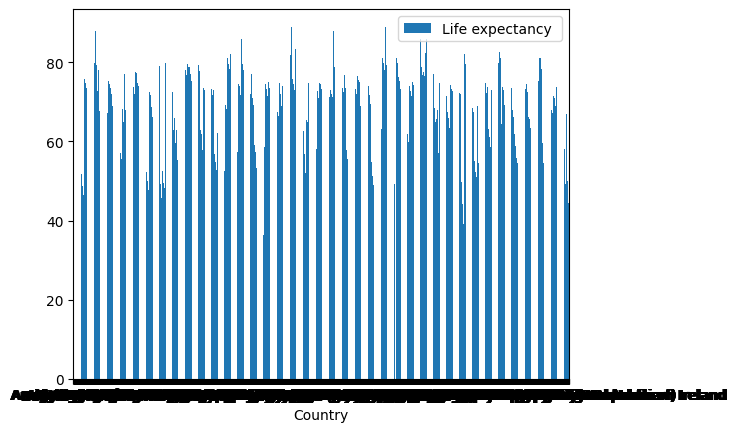

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = data[data['Year'] <= 2030]

data = data[['Country', 'Life expectancy ']]

data.plot.bar(x='Country', y='Life expectancy ', rot=0)

plt.show()